 
<img width="200px" height="200px" src='logo-en.png'/>

<br/>
<div style="text-align: center; font-size:20px; font-weight:bold; color: #212F3D">King Abdullah I School of Graduate Studies and Scientific Research</div><br/>
<div style="text-align: center; font-size:20px; font-weight:bold; color: #212F3D;">Data Augmentation using Transformers and Similarity Measures for Improving Arabic Text Classification</div><br/>
<div style="text-align: center; font-size:14px; font-weight:bold; color: #212F3D">Dania Refai<sup>1</sup>, Saleh Abu-Soud<sup>2</sup>, Mohammad Abdel-Rahman<sup>3</sup></div>
<br/>
<div style="text-align: left; font-size:14px; font-weight:normal; color: #212F3D">
    <sup>1</sup> Department of Computer Science, Princess Sumaya University for Technology (PSUT), Amman, Jordan</div>
<br/>
<div style="text-align: left; font-size:14px; font-weight:normal; color: #212F3D">
    <sup>2</sup> Department of Data Science, Princess Sumaya University for Technology (PSUT), Amman, Jordan</div>
<br/>
<div style="text-align: left; font-size:14px; font-weight:normal; color: #212F3D">
    <sup>3</sup> Department of Data Science, Princess Sumaya University for Technology (PSUT), Amman, Jordan</div>
<br/>

<div style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">
        Crosspending author: Dania Refai (<span style="text-align: left; font-size:16px; font-weight:bold; color: #6495ED">Dania.Refai@hotmail.com</span>).
</div>
<br/>
<hr/>

### <span style="text-align: left; font-size:20px; font-weight:bold; color: #C70039">General Notes and Directions</span> ###
<hr/>

> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp;Make sure you have pytorch installed on your machine. Moreover, if you want more information please refer to <a href="https://pytorch.org/">INSTALL PYTORCH</a> from their official website.</li>
> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp;Make sure your installed python version is 3.8</li>
> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp;Make sure you are running the commands INSIDE source code directory (<span style="color: #C70039">.\Implementation\</span>)</li>
> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp;Run the following commands in your command shell to create and activate a Virtualenv (<span style="color: #C70039">Windows based systems</span>):</li>
> <ol>    
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> set PATH=C:\Users\(<span style="text-align: left; font-size:14px; font-weight:bold; color: #C70039">-windows_user-</span>)\AppData\Local\Programs\Python\Python38\
    </li>
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> %PATH%\python.exe -m pip install --upgrade pip
    </li>   
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> %PATH%python.exe %PATH%Scripts\pip.exe install virtualenv 
    </li>    
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> %PATH%\python.exe -m virtualenv venv 
    </li>
> </ol>
> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp; Activate the virtual environment: </li>
> <ol>    
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> .\venv\Scripts\activate
    </li>  
> </ol>
> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp; Install requirements:</li>
> <ol>    
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> .\venv\Scripts\pip3 install python-dotenv
    </li>
> <li style="text-align: left; font-family:console; font-size:14px; font-weight:bold; color: #212F3D; list-style-type: none;">
       <span style="color: #C70039">cmd&gt;</span> .\venv\Scripts\pip3 install -r requirements.txt
    </li>   
> </ol>

> <li style="text-align: left; font-size:14px; font-weight:bold; color: #212F3D">&nbsp;Notebook Purpose: <span style="color: #C70039">Sentiment Analysis for MOV dataset using Model: </span>aubmindlab/bert-base-arabertv02-twitter</li>



### Imports

In [1]:
!set PYTORCH_NO_CUDA_MEMORY_CACHING=1

In [2]:
import torch, os
import pandas as pd
import numpy as np
from typing import List
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import copy
from preprocess import ArabertPreprocessor
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score

from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers import BertForSequenceClassification
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, precision_recall_curve
from transformers.data.processors.utils import InputFeatures
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from transformers import pipeline
import more_itertools
import GPUtil as GPU
import gc; 
from GPUtil import showUtilization as gpu_usage
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')
%matplotlib inline
sns.set()


### Utils

In [3]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
        super(ClassificationDataset).__init__()
        self.text = text
        self.target = target
        self.tokenizer_name = model_name
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.max_len = max_len
        self.label_map = label_map
      

    def __len__(self):
        return len(self.text)

    def __getitem__(self,item):
        text = str(self.text[item])
        text = " ".join(text.split())
        inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
          )      
        return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [4]:
'''
	This custom dataset class will help us hold our datasets in a structred manner.	
'''
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

### Loading Training Dataset (Already Augmented)

In [5]:
datasetname = 'MOV'
datasetpath = "Augmented-Dataset/xls/MOV-Augmented-aragpt2-base.xlsx"
df = pd.read_excel( datasetpath)
df.columns = ['text', 'label', 'new_text', 'all_text', 'original_embbedding', 'new_embbedding', 'ecu_similarity', 'cos_similarity', 'jacc_similarity','text_split', 'all_text_split', 'new_text_split', 'bleu_sim_1','bleu_sim_2', 'bleu_sim_3', 'bleu_sim_4'] 
df.head()

,text,label,new_text,all_text,original_embbedding,new_embbedding,ecu_similarity,cos_similarity,jacc_similarity,text_split,all_text_split,new_text_split,bleu_sim_1,bleu_sim_2,bleu_sim_3,bleu_sim_4
0,عظماء ولكن في أشياء كتير أوي ممكن تخلي أي فيلم...,NEG,NaN,عظماء ولكن في أشياء كتير أوي ممكن تخلي أي فيلم...,"0.023597183,0.01086875,-0.03102856,-0.03223265...",0,0.023597,NaN,0.0,"['عظماء', 'ولكن', 'في', 'أشياء', 'كتير', 'أوي'...","['عظماء', 'ولكن', 'في', 'أشياء', 'كتير', 'أوي'...",['nan'],0.02,0.01,0.01,0.01
1,حقا انه افضل افلام السينما المصرية فى البداية ...,POS,NaN,حقا انه افضل افلام السينما المصرية فى البداية ...,"0.030677188,0.040905435,-0.031328138,-0.030169...",0,0.030677,NaN,0.0,"['حقا', 'انه', 'افضل', 'افلام', 'السينما', 'ال...","['حقا', 'انه', 'افضل', 'افلام', 'السينما', 'ال...",['nan'],0.25,0.23,0.22,0.22
2,كبت وحرمان وغيرة بعيدا عن تصوير حالات وقضايا ا...,POS,NaN,كبت وحرمان وغيرة بعيدا عن تصوير حالات وقضايا ا...,"0.014913844,0.027157936,-0.030840687,-0.023250...",0,0.014914,NaN,0.0,"['كبت', 'وحرمان', 'وغيرة', 'بعيدا', 'عن', 'تصو...","['كبت', 'وحرمان', 'وغيرة', 'بعيدا', 'عن', 'تصو...",['nan'],0.00,0.00,0.00,0.00
3,المومياء...يوم ان يُحصى الابداع! هناك فى مجال ...,POS,NaN,المومياء . . يوم ان يحصى الابداع ! هناك فى مجا...,"0.036414325,0.028412146,-0.037543822,-0.037372...",0,0.036414,NaN,0.0,"['المومياء...يوم', 'ان', 'يُحصى', 'الابداع!', ...","['المومياء', '.', '.', 'يوم', 'ان', 'يحصى', 'ا...",['nan'],0.00,0.00,0.00,0.00
4,مفيش جديد للاسف فى اوائل حلقات مسلسل الصفعة اش...,NEG,NaN,مفيش جديد للاسف فى اوائل حلقات مسلسل الصفعة اش...,"0.026780926,0.009709039,-0.030822175,-0.033138...",0,0.026781,NaN,0.0,"['مفيش', 'جديد', 'للاسف', 'فى', 'اوائل', 'حلقا...","['مفيش', 'جديد', 'للاسف', 'فى', 'اوائل', 'حلقا...",['nan'],0.12,0.11,0.11,0.11


In [6]:
DATA_COLUMN  = "text"
LABEL_COLUMN = "label"
all_datasets = []

In [7]:
EcuDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-ECU-ALL-Text-Final.xlsx")
CosDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-COS-ALL-Text-Final.xlsx")
JacDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-JAC-ALL-Text-Final.xlsx")
BleDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-BLE-ALL-Text-Final.xlsx")
EcuDF.columns = [DATA_COLUMN, LABEL_COLUMN]
CosDF.columns = [DATA_COLUMN, LABEL_COLUMN]
JacDF.columns = [DATA_COLUMN, LABEL_COLUMN]
BleDF.columns = [DATA_COLUMN, LABEL_COLUMN]

### Train: Augmented, Test: Augmented, Text: All-Text

In [8]:
# Original Dataset - all text
df = df[[DATA_COLUMN, LABEL_COLUMN]]
train, test = train_test_split(df, test_size=0.2, random_state=42)
label_list = list(df[LABEL_COLUMN].unique())
data = CustomDataset(datasetname+"-Not-Augmented-all-text", train, test, label_list)
all_datasets.append(data)

# Augmented-ECU-Final - all text 
train_ECU, test_ECU = train_test_split(EcuDF, test_size=0.2, random_state=42)
label_list_ECU = list(EcuDF[LABEL_COLUMN].unique())
data_ECU = CustomDataset("ECU-"+datasetname+"-Augmented-Test-all-text", train_ECU, test_ECU, label_list_ECU)
all_datasets.append(data_ECU)

# Augmented-COS-Final - all text
train_COS, test_COS = train_test_split(CosDF, test_size=0.2, random_state=42)
label_list_COS = list(CosDF[LABEL_COLUMN].unique())
data_COS = CustomDataset("COS-"+datasetname+"-Augmented-Test-all-text", train_COS, test_COS, label_list_COS)
all_datasets.append(data_COS)

# Augmented-JACC-Final - all text
train_JACC, test_JACC = train_test_split(JacDF, test_size=0.2, random_state=42)
label_list_JACC = list(JacDF[LABEL_COLUMN].unique())
data_JACC = CustomDataset("JAC-"+datasetname+"-Augmented-Test-all-text", train_JACC, test_JACC, label_list_JACC)
all_datasets.append(data_JACC)

# Augmented-BLEU-Final - all text
train_BLEU, test_BLEU = train_test_split(BleDF, test_size=0.2, random_state=42)
label_list_BLEU = list(BleDF[LABEL_COLUMN].unique())
data_BLEU = CustomDataset("BLE-"+datasetname+"-Augmented-Test-all-text", train_BLEU, test_BLEU, label_list_BLEU)
all_datasets.append(data_BLEU)

### Train: Augmented, Test: Augmented, Text: New-Text

In [9]:
EcuDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-ECU-new-Text-Final.xlsx")
CosDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-COS-new-Text-Final.xlsx")
JacDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-JAC-new-Text-Final.xlsx")
BleDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-BLE-new-Text-Final.xlsx")
EcuDF.columns = [DATA_COLUMN, LABEL_COLUMN]
CosDF.columns = [DATA_COLUMN, LABEL_COLUMN]
JacDF.columns = [DATA_COLUMN, LABEL_COLUMN]
BleDF.columns = [DATA_COLUMN, LABEL_COLUMN]

In [10]:
# Augmented-ECU-Final - new text 
train_ECU, test_ECU = train_test_split(EcuDF, test_size=0.2, random_state=42)
label_list_ECU = list(EcuDF[LABEL_COLUMN].unique())
data_ECU = CustomDataset("ECU-"+datasetname+"-Augmented-Test-new-text", train_ECU, test_ECU, label_list_ECU)
all_datasets.append(data_ECU)

# Augmented-COS-Final - new text
train_COS, test_COS = train_test_split(CosDF, test_size=0.2, random_state=42)
label_list_COS = list(CosDF[LABEL_COLUMN].unique())
data_COS = CustomDataset("COS-"+datasetname+"-Augmented-Test-new-text", train_COS, test_COS, label_list_COS)
all_datasets.append(data_COS)

# Augmented-JACC-Final - new text
train_JACC, test_JACC = train_test_split(JacDF, test_size=0.2, random_state=42)
label_list_JACC = list(JacDF[LABEL_COLUMN].unique())
data_JACC = CustomDataset("JAC-"+datasetname+"-Augmented-Test-new-text", train_JACC, test_JACC, label_list_JACC)
all_datasets.append(data_JACC)

# Augmented-BLEU-Final - all text
train_BLEU, test_BLEU = train_test_split(BleDF, test_size=0.2, random_state=42)
label_list_BLEU = list(BleDF[LABEL_COLUMN].unique())
data_BLEU = CustomDataset("BLE-"+datasetname+"-Augmented-Test-new-text", train_BLEU, test_BLEU, label_list_BLEU)
all_datasets.append(data_BLEU)

### Train: Augmented, Test: Not-Augmented, Text: All-Text

In [11]:
EcuDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-ECU-ALL-Text-Final.xlsx")
CosDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-COS-ALL-Text-Final.xlsx")
JacDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-JAC-ALL-Text-Final.xlsx")
BleDF = pd.read_excel( "Augmented-Dataset/All/"+datasetname+"-Augmented-BLE-ALL-Text-Final.xlsx")
EcuDF.columns = [DATA_COLUMN, LABEL_COLUMN]
CosDF.columns = [DATA_COLUMN, LABEL_COLUMN]
JacDF.columns = [DATA_COLUMN, LABEL_COLUMN]
BleDF.columns = [DATA_COLUMN, LABEL_COLUMN]

In [12]:
# Augmented-ECU-Final - all text 
train_ECU, test_ECU = train_test_split(EcuDF, test_size=0.2, random_state=42)
label_list_ECU = list(EcuDF[LABEL_COLUMN].unique())
data_ECU = CustomDataset("ECU-"+datasetname+"-Not-Augmented-Test-all-text", train_ECU, test, label_list_ECU)
all_datasets.append(data_ECU)

# Augmented-COS-Final - all text
train_COS, test_COS = train_test_split(CosDF, test_size=0.2, random_state=42)
label_list_COS = list(CosDF[LABEL_COLUMN].unique())
data_COS = CustomDataset("COS-"+datasetname+"-Not-Augmented-Test-all-text", train_COS, test, label_list_COS)
all_datasets.append(data_COS)

# Augmented-JACC-Final - all text
train_JACC, test_JACC = train_test_split(JacDF, test_size=0.2, random_state=42)
label_list_JACC = list(JacDF[LABEL_COLUMN].unique())
data_JACC = CustomDataset("JAC-"+datasetname+"-Not-Augmented-Test-all-text", train_JACC, test, label_list_JACC)
all_datasets.append(data_JACC)

# Augmented-BLEU-Final - all text
train_BLEU, test_BLEU = train_test_split(BleDF, test_size=0.2, random_state=42)
label_list_BLEU = list(BleDF[LABEL_COLUMN].unique())
data_BLEU = CustomDataset("BLE-"+datasetname+"-Not-Augmented-Test-all-text", train_BLEU, test, label_list_BLEU)
all_datasets.append(data_BLEU)

### Train: Augmented, Test: Not-Augmented, Text: New-Text

In [13]:
EcuDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-ECU-new-Text-Final.xlsx")
CosDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-COS-new-Text-Final.xlsx")
JacDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-JAC-new-Text-Final.xlsx")
BleDF = pd.read_excel( "Augmented-Dataset/new/"+datasetname+"-Augmented-BLE-new-Text-Final.xlsx")
EcuDF.columns = [DATA_COLUMN, LABEL_COLUMN]
CosDF.columns = [DATA_COLUMN, LABEL_COLUMN]
JacDF.columns = [DATA_COLUMN, LABEL_COLUMN]
BleDF.columns = [DATA_COLUMN, LABEL_COLUMN]

In [14]:
# Augmented-ECU-Final - new text 
train_ECU, test_ECU = train_test_split(EcuDF, test_size=0.2, random_state=42)
label_list_ECU = list(EcuDF[LABEL_COLUMN].unique())
data_ECU = CustomDataset("ECU-"+datasetname+"-Not-Augmented-Test-new-text", train_ECU, test, label_list_ECU)
all_datasets.append(data_ECU)

# Augmented-COS-Final - new text
train_COS, test_COS = train_test_split(CosDF, test_size=0.2, random_state=42)
label_list_COS = list(CosDF[LABEL_COLUMN].unique())
data_COS = CustomDataset("COS-"+datasetname+"-Not-Augmented-Test-new-text", train_COS, test, label_list_COS)
all_datasets.append(data_COS)

# Augmented-JACC-Final - new text
train_JACC, test_JACC = train_test_split(JacDF, test_size=0.2, random_state=42)
label_list_JACC = list(JacDF[LABEL_COLUMN].unique())
data_JACC = CustomDataset("JAC-"+datasetname+"-Not-Augmented-Test-new-text", train_JACC, test, label_list_JACC)
all_datasets.append(data_JACC)

# Augmented-BLEU-Final - all text
train_BLEU, test_BLEU = train_test_split(BleDF, test_size=0.2, random_state=42)
label_list_BLEU = list(BleDF[LABEL_COLUMN].unique())
data_BLEU = CustomDataset("BLE-"+datasetname+"-Not-Augmented-Test-new-text", train_BLEU, test, label_list_BLEU)
all_datasets.append(data_BLEU)

### Printing All Datasets Names

In [15]:
for d in all_datasets:
    print(d.name)

MOV-Not-Augmented-all-text
ECU-MOV-Augmented-Test-all-text
COS-MOV-Augmented-Test-all-text
JAC-MOV-Augmented-Test-all-text
BLE-MOV-Augmented-Test-all-text
ECU-MOV-Augmented-Test-new-text
COS-MOV-Augmented-Test-new-text
JAC-MOV-Augmented-Test-new-text
BLE-MOV-Augmented-Test-new-text
ECU-MOV-Not-Augmented-Test-all-text
COS-MOV-Not-Augmented-Test-all-text
JAC-MOV-Not-Augmented-Test-all-text
BLE-MOV-Not-Augmented-Test-all-text
ECU-MOV-Not-Augmented-Test-new-text
COS-MOV-Not-Augmented-Test-new-text
JAC-MOV-Not-Augmented-Test-new-text
BLE-MOV-Not-Augmented-Test-new-text


### PR-ROC

In [16]:
from torch.utils.data import DataLoader
import torch
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from transformers import BertTokenizer, BertForSequenceClassification
import os
datasetname         = 'MOV'
model_name          = 'aubmindlab/bert-base-arabertv02-twitter' 
all_models_dir      = "models\\" + datasetname + "\\"
all_results         = []
positive_label_key  = 1 # {'NEG': 0, 'POS': 1, 'NEUTRAL': 2}

# ** find_folders_with_prefix **
def find_folders_with_prefix(directory, search_str):
    folders = []
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)) and item.startswith(search_str):
            folders.append(item)
    return folders

# ** compute_roc_and_pr **    
def compute_roc_and_pr (true_labesl, predicted_labels, pos_label):
    precision, recall, _ = precision_recall_curve (true_labels, predicted_labels, pos_label=pos_label) 
    pr_auc               = auc                    (recall, precision)
    fpr, tpr, _          = roc_curve              (true_labels, predicted_labels, pos_label=pos_label)
    roc_auc              = auc                    (fpr, tpr)
    fpr                  = fpr[1:]
    tpr                  = tpr[1:]
    return {    'fpr'           : fpr            ,
                'tpr'           : tpr            ,
                'precision'     : precision      ,
                'recall'        : recall         ,
                'roc_auc'       : roc_auc        ,
                'pr_auc'        : pr_auc
           }

# ** get_fold_num_from_str ** 
def get_fold_num_from_str (text):
    tmp = -1    
    if '_0_' in text:
        tmp = 0
    elif '_1_' in text:
        tmp = 1
    elif '_2_' in text:
        tmp = 2
    elif '_3_' in text:
        tmp = 3
    elif '_4_' in text:
        tmp = 4
    else:
        return -1    
    return tmp

In [17]:
# process all datasets for finding PR and ROC    
# ['NEG', 'POS', 'NEUTRAL'] ******************************************
for dataset in all_datasets:       
    selected_dataset                = copy.deepcopy(dataset)
    dataset_name                    = selected_dataset.name
    dataset_models_dirs             = []
    arabic_prep                     = ArabertPreprocessor(model_name)
    label_map                       = {v:index for index, v in enumerate(selected_dataset.label_list)}        
    fold_num                        = 0
    dataset_models_dirs             = find_folders_with_prefix(all_models_dir, dataset_name)
    for directory in dataset_models_dirs:
        fold_num     = get_fold_num_from_str(directory)
        print("PR&ROC: Dataset-" + dataset_name + ", fold-" + str(fold_num))
        model_dir    = all_models_dir + directory
        config_dir   = all_models_dir + directory + "\\config.json"
        model        = BertForSequenceClassification.from_pretrained(model_dir)
        config       = AutoConfig.from_pretrained(config_dir)
        tokenizer    = AutoTokenizer.from_pretrained(model_name)
         
        # Use DataLoader to process the data in batches
        test_data    = selected_dataset.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x)).to_list()
        test_labels  = selected_dataset.test[LABEL_COLUMN].to_list()
        test_dataset = list(zip(test_data, test_labels))
        test_loader  = DataLoader(test_dataset, batch_size=8, shuffle=False)
         
        predicted_probabilities = []
        true_labels             = []
        with torch.no_grad():
            for batch in test_loader:
                 #print(batch)
                batch_data, label_data = batch #batch_data   = [data for data, _ in batch]
                batch_labels           = [label_map[label] for label in label_data]
                inputs                 = tokenizer(batch_data, return_tensors="pt", padding=True, truncation=True)
                outputs                = model(**inputs)
                batch_probs            = outputs.logits.softmax(dim=-1).detach().numpy()
                predicted_probabilities.append(batch_probs)
                true_labels.extend(batch_labels)
                
        predicted_probabilities = np.concatenate(predicted_probabilities, axis=0)
        predicted_labels        = predicted_probabilities.argmax(axis=-1)
        results                 = compute_roc_and_pr(true_labels, predicted_labels, positive_label_key)
        results['Dataset_Name'] = dataset_name
        results['Fold_No']      = fold_num
        all_results.append(results)

PR&ROC: Dataset-MOV-Not-Augmented-all-text, fold-0
PR&ROC: Dataset-MOV-Not-Augmented-all-text, fold-1
PR&ROC: Dataset-MOV-Not-Augmented-all-text, fold-2
PR&ROC: Dataset-MOV-Not-Augmented-all-text, fold-3
PR&ROC: Dataset-MOV-Not-Augmented-all-text, fold-4
PR&ROC: Dataset-ECU-MOV-Augmented-Test-all-text, fold-0
PR&ROC: Dataset-ECU-MOV-Augmented-Test-all-text, fold-1
PR&ROC: Dataset-ECU-MOV-Augmented-Test-all-text, fold-2
PR&ROC: Dataset-ECU-MOV-Augmented-Test-all-text, fold-3
PR&ROC: Dataset-ECU-MOV-Augmented-Test-all-text, fold-4
PR&ROC: Dataset-COS-MOV-Augmented-Test-all-text, fold-0
PR&ROC: Dataset-COS-MOV-Augmented-Test-all-text, fold-1
PR&ROC: Dataset-COS-MOV-Augmented-Test-all-text, fold-2
PR&ROC: Dataset-COS-MOV-Augmented-Test-all-text, fold-3
PR&ROC: Dataset-COS-MOV-Augmented-Test-all-text, fold-4
PR&ROC: Dataset-JAC-MOV-Augmented-Test-all-text, fold-0
PR&ROC: Dataset-JAC-MOV-Augmented-Test-all-text, fold-1
PR&ROC: Dataset-JAC-MOV-Augmented-Test-all-text, fold-2
PR&ROC: Dataset-J

### Export Results to Backup File

In [18]:
results = pd.DataFrame.from_dict(all_results, orient='columns')   

In [19]:
results.head()

,fpr,tpr,precision,recall,roc_auc,pr_auc,Dataset_Name,Fold_No
0,[1.0],[1.0],"[0.6546052631578947, 1.0]","[1.0, 0.0]",0.500000,0.827303,MOV-Not-Augmented-all-text,0
1,[1.0],[1.0],"[0.6546052631578947, 1.0]","[1.0, 0.0]",0.500000,0.827303,MOV-Not-Augmented-all-text,1
2,"[0.9904761904761905, 1.0]","[1.0, 1.0]","[0.6546052631578947, 0.6567656765676567, 1.0]","[1.0, 1.0, 0.0]",0.504762,0.828383,MOV-Not-Augmented-all-text,2
3,[1.0],[1.0],"[0.6546052631578947, 1.0]","[1.0, 0.0]",0.500000,0.827303,MOV-Not-Augmented-all-text,3
4,[1.0],[1.0],"[0.6546052631578947, 1.0]","[1.0, 0.0]",0.500000,0.827303,MOV-Not-Augmented-all-text,4


In [21]:
results.to_excel("LatestResults/MOV/MOV-PR-ROC.xlsx")

### Plots from Results 

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, roc_curve

# Read in the data from the Excel file
df = pd.read_excel('LatestResults/MOV/MOV-PR-ROC.xlsx')

# Group the data by dataset name and aggregate the ROC_AUC and PR_AUC scores by their mean values
grouped_df = df.groupby('Dataset_Name').agg({'fpr': 'mean', 'tpr': 'mean','roc_auc': 'mean', 'pr_auc': 'mean'})

# Reset the index to turn the dataset name from an index into a regular column
augmented_df = grouped_df.reset_index()

# Creating the not-augmented dataset 
not_augmented_df = pd.DataFrame(columns=augmented_df.columns)

# loop through each row in the dataframe
for index, row in augmented_df.iterrows():
    # check if Dataset_Name contains "Not-Augmented"
    if 'Not-Augmented' in row['Dataset_Name']:
        # add row to new dataframe
        not_augmented_df = pd.concat([not_augmented_df, row.to_frame().T], ignore_index=True)
        # drop row from original dataframe
        augmented_df.drop(index, inplace=True)

In [3]:
# view the splitted records 
augmented_df.head()

,Dataset_Name,fpr,tpr,roc_auc,pr_auc
0,BLE-MOV-Augmented-Test-all-text,0.634783,0.984293,0.674755,0.804556
1,BLE-MOV-Augmented-Test-new-text,0.615217,0.998953,0.691868,0.813561
4,COS-MOV-Augmented-Test-all-text,0.998095,1.000000,0.500952,0.827519
5,COS-MOV-Augmented-Test-new-text,0.998095,1.000000,0.500952,0.827519
8,ECU-MOV-Augmented-Test-all-text,0.751948,0.995000,0.621526,0.815048


In [4]:
# view the splitted records 
not_augmented_df.head()

,Dataset_Name,fpr,tpr,roc_auc,pr_auc
0,BLE-MOV-Not-Augmented-Test-all-text,0.933333,0.974874,0.520771,0.827854
1,BLE-MOV-Not-Augmented-Test-new-text,0.99619,1.0,0.501905,0.827735
2,COS-MOV-Not-Augmented-Test-all-text,0.998095,1.0,0.500952,0.827519
3,COS-MOV-Not-Augmented-Test-new-text,0.998095,1.0,0.500952,0.827519
4,ECU-MOV-Not-Augmented-Test-all-text,0.92381,0.988945,0.532568,0.833053


In [5]:
# fixing the dataset name 
augmented_df.Dataset_Name     = [name.replace ('-',' ').replace(' Test', '').replace('Augmented'    , '') for name in augmented_df.Dataset_Name]
not_augmented_df.Dataset_Name = [name.replace ('-',' ').replace(' Test', '').replace('Not Augmented', '') for name in not_augmented_df.Dataset_Name]

### Plotting the ROC_AUC/PR_AUC Scroes

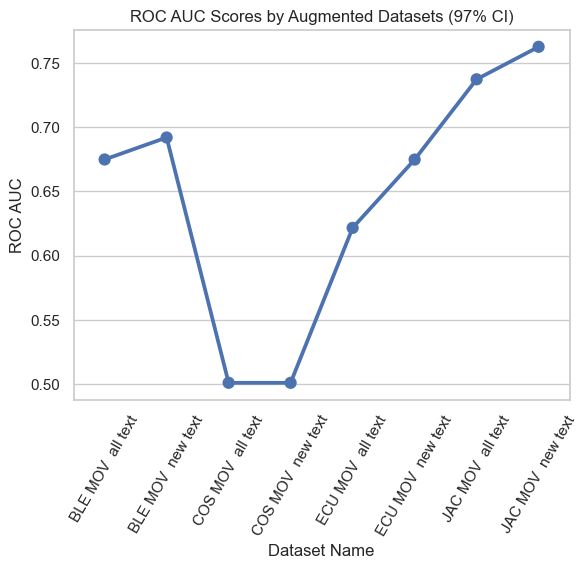

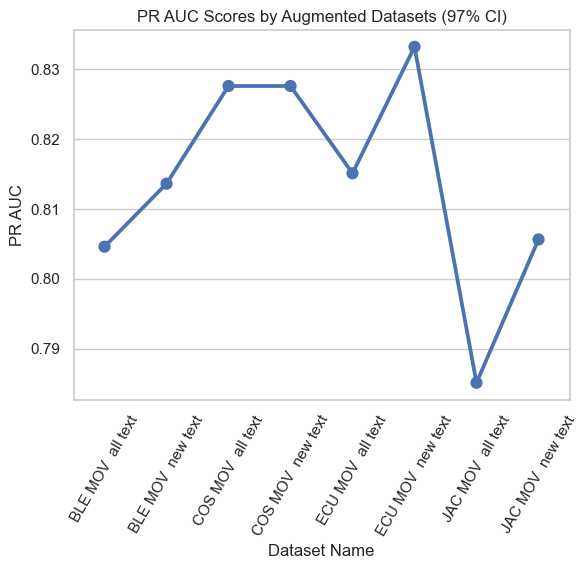

In [6]:
# Create a point plot of mean ROC_AUC and PR_AUC scores for each dataset
sns.set(style='whitegrid')
sns.pointplot(x='Dataset_Name', y='roc_auc', data=augmented_df, errorbar=('ci', 97))
plt.title('ROC AUC Scores by Augmented Datasets (97% CI)')
plt.xlabel('Dataset Name', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.xticks(rotation=60)
plt.show()

sns.pointplot(x='Dataset_Name', y='pr_auc', data=augmented_df, errorbar=('ci', 97))
plt.title('PR AUC Scores by Augmented Datasets (97% CI)')
plt.xlabel('Dataset Name', fontsize=12)
plt.ylabel('PR AUC', fontsize=12)
plt.xticks(rotation=60)
plt.show()

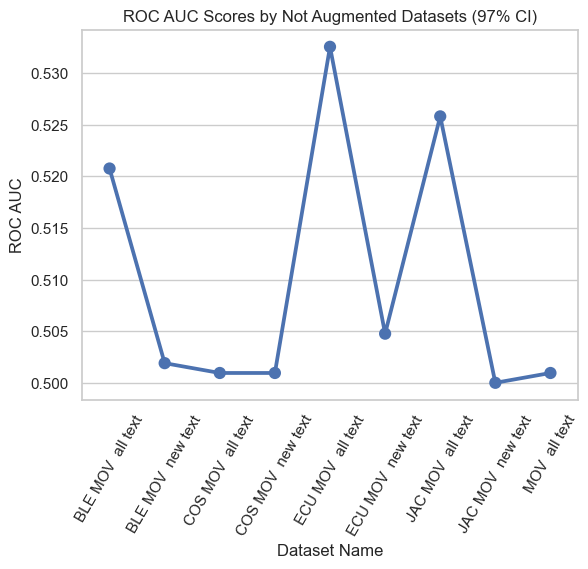

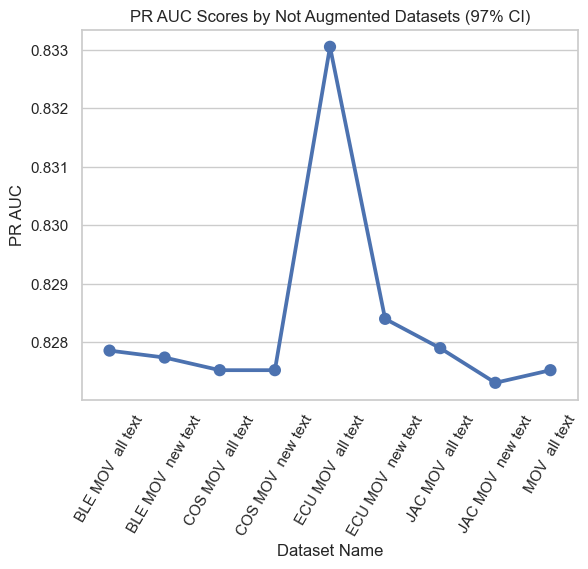

In [7]:
# Create a point plot of mean ROC_AUC and PR_AUC scores for each dataset
sns.set(style='whitegrid')
sns.pointplot(x='Dataset_Name', y='roc_auc', data=not_augmented_df, errorbar=('ci', 97))
plt.title('ROC AUC Scores by Not Augmented Datasets (97% CI)')
plt.xlabel('Dataset Name', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.xticks(rotation=60)
plt.show()

sns.pointplot(x='Dataset_Name', y='pr_auc', data=not_augmented_df, errorbar=('ci', 97))
plt.title('PR AUC Scores by Not Augmented Datasets (97% CI)')
plt.xlabel('Dataset Name', fontsize=12)
plt.ylabel('PR AUC', fontsize=12)
plt.xticks(rotation=60)
plt.show()